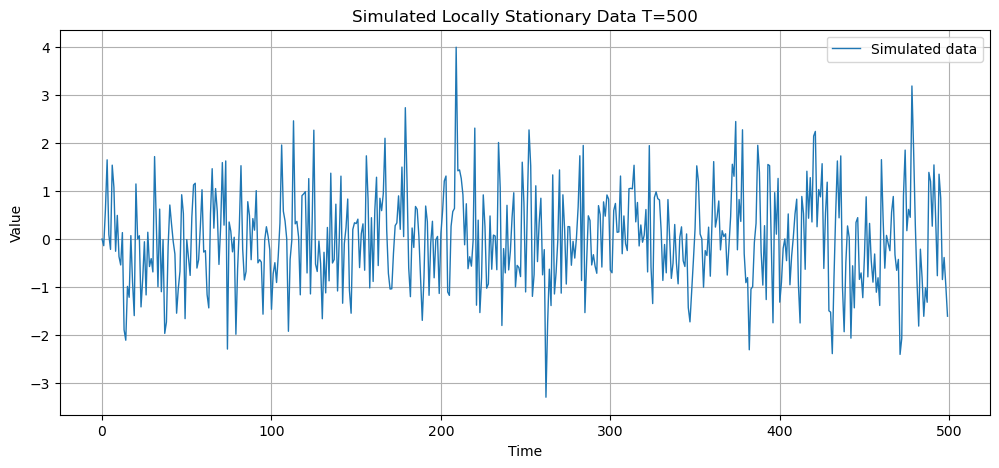

0.4997659074212265 0.636621746694226
1.0


In [ ]:
import numpy as np
import math
import matplotlib.pyplot as plt
from scipy.stats import wasserstein_distance

# Defining the weight function
def omega(t, x, c1, c2):
    sigma = math.sqrt(np.var(Y))
    h1 = (c1/math.sqrt(12))*(T ** (-(1/5)))
    h2 = c2*sigma*(T ** (-(1/5)))
    numerator = K_h1(t/T - t / T, h1) * np.prod(K_h2(x - Y[t-1], h2))
    denominator = np.sum([K_h1(s/T - s / T, h1) * np.prod(K_h2(x - Y[s-1], h2)) for s in range(1, T+1)])
    return numerator / denominator

# Defining the empirical conditional distribution function estimator
def ecdf(x, v):
    weights = np.array([omega(t, x, c1, c2) for t in range(1, T+1)])
    indicator = (Y <= v).astype(int)
    return np.sum(weights * indicator)

# Define uniform kernels for K1
def K_h1(z, h1):
    return 0.5 if abs(z/h1) <= 1 else 0

# Define Gaussian kernels for K2
def K_h2(z, h2):
    return np.exp(-z**2 / (2 * h2**2))

# Generate locally stationary data
np.random.seed(42)
# Define the time-varying parameter
def time_varying_param(t):
    phi = 0.2 + 0.3 * np.sin(0.1 * t/T)
    return phi

# Simulate the time-varying AR(1) model
def simulate_tv_ar(T, param_func):
    epsilon = np.random.normal(0, 1, T)
    y = np.zeros(T)
    
    for t in range(1, T):
        phi = param_func(t)
        y[t] = phi * y[t-1] + epsilon[t]
    
    return y

#####################################################################################################
#Example

# Parameters
T = 500  # Length of time series
d = 1  # Number of covariates
c1 = 6
c2 = 2.2

# Generate locally stationary data of length T

Y = simulate_tv_ar(T, time_varying_param)

# Plot the generated data
plt.figure(figsize=(12, 5))
plt.plot(Y, label="Simulated data", linewidth=1)
plt.title(f"Simulated Locally Stationary Data T={T}")
plt.xlabel("Time")
plt.ylabel("Value")
plt.legend()
plt.grid(True)
plt.show()

h1 = (c1/math.sqrt(12))*(T ** (-(1/5)))
h2 = c2*math.sqrt(np.var(Y))*(T ** (-(1/5)))
print(h1,h2)

# Test the weight function for a given (u, x)
x_test = np.array([0])

#weights = [omega(t, u_test, x_test, c1, c2) for t in range(1, T+1)]

#Values for plotting
v_values = np.linspace(Y.min(), Y.max(), T)
F=ecdf(x_test, Y.max())
print(F)
F_values = [ecdf(x_test, v) for v in v_values]

#True CDF
data_sorted = np.sort(Y)
True_CDF = np.arange(1, len(data_sorted) + 1) / len(data_sorted)

#Plot the estimated distribution function
plt.figure(figsize=(12, 6))
plt.step(data_sorted, True_CDF, where='post', label='True Distribution Function')
plt.plot(v_values, F_values, label="Estimated Distribution Function", color='blue')
plt.title(f"Comparison between the True and Estimated Distribution Functions for (T, c1, c2) = ({T}, {c1}, {c2})")
plt.xlabel("Value")
plt.ylabel("Probability")
plt.legend()
plt.grid(True)
plt.show()


# Define two probability distributions (as arrays)
dist1 = True_CDF
dist2 = F_values

# Compute the 1-Wasserstein distance and its expectation
W1 = wasserstein_distance(dist1, dist2)
print("1-Wasserstein distance: ", W1)